# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
mars_temp_soup = soup(html, 'html.parser')

In [12]:
# Extract all rows of data
main_content = mars_temp_soup.find('div', class_='container-fluid py-5')
table = main_content.find('table')
rows = table.find_all('tr')
data = []
for row in rows[1:]:
    cells = row.find_all('td')
    row_data = [cell.get_text(strip=True) for cell in cells]
    data.append(row_data)
for row in data:
    print(row)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [13]:
# Create an empty list
mars_temp_data = []

# Loop through the scraped data to create a list of rows
for row in data:
    id_value = row[0]
    terrestrial_date = row[1]
    sol = int(row[2])
    ls = float(row[3])
    month = int(row[4])
    min_temp = float(row[5])
    pressure = float(row[6])
    
    mars_temp_data.append({
        'id': id_value,
        'terrestrial_date': terrestrial_date,
        'sol': sol,
        'ls': ls,
        'month': month,
        'min_temp': min_temp,
        'pressure': pressure
    })
    
    mars_temp_df = pd.DataFrame(mars_temp_data)
    
    print(mars_temp_df)

  id terrestrial_date  sol     ls  month  min_temp  pressure
0  2       2012-08-16   10  155.0      6     -75.0     739.0
   id terrestrial_date  sol     ls  month  min_temp  pressure
0   2       2012-08-16   10  155.0      6     -75.0     739.0
1  13       2012-08-17   11  156.0      6     -76.0     740.0
   id terrestrial_date  sol     ls  month  min_temp  pressure
0   2       2012-08-16   10  155.0      6     -75.0     739.0
1  13       2012-08-17   11  156.0      6     -76.0     740.0
2  24       2012-08-18   12  156.0      6     -76.0     741.0
   id terrestrial_date  sol     ls  month  min_temp  pressure
0   2       2012-08-16   10  155.0      6     -75.0     739.0
1  13       2012-08-17   11  156.0      6     -76.0     740.0
2  24       2012-08-18   12  156.0      6     -76.0     741.0
3  35       2012-08-19   13  157.0      6     -74.0     732.0
   id terrestrial_date  sol     ls  month  min_temp  pressure
0   2       2012-08-16   10  155.0      6     -75.0     739.0
1  13     

     id terrestrial_date  sol     ls  month  min_temp  pressure
0     2       2012-08-16   10  155.0      6     -75.0     739.0
1    13       2012-08-17   11  156.0      6     -76.0     740.0
2    24       2012-08-18   12  156.0      6     -76.0     741.0
3    35       2012-08-19   13  157.0      6     -74.0     732.0
4    46       2012-08-20   14  157.0      6     -74.0     740.0
..  ...              ...  ...    ...    ...       ...       ...
60  216       2012-10-21   74  192.0      7     -72.0     790.0
61  217       2012-10-22   75  192.0      7     -73.0     791.0
62  218       2012-10-23   76  193.0      7     -73.0     792.0
63  219       2012-10-24   77  193.0      7     -71.0     792.0
64  220       2012-10-25   78  194.0      7     -71.0     793.0

[65 rows x 7 columns]
     id terrestrial_date  sol     ls  month  min_temp  pressure
0     2       2012-08-16   10  155.0      6     -75.0     739.0
1    13       2012-08-17   11  156.0      6     -76.0     740.0
2    24       201

      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2     24       2012-08-18   12  156.0      6     -76.0     741.0
3     35       2012-08-19   13  157.0      6     -74.0     732.0
4     46       2012-08-20   14  157.0      6     -74.0     740.0
..   ...              ...  ...    ...    ...       ...       ...
195  130       2013-04-05  236  295.0     10     -72.0     886.0
196  131       2013-04-06  237  295.0     10     -71.0     883.0
197  132       2013-04-07  238  296.0     10     -70.0     885.0
198  133       2013-04-08  239  297.0     10     -73.0     885.0
199  135       2013-04-09  240  297.0     10     -70.0     884.0

[200 rows x 7 columns]
      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2

      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2     24       2012-08-18   12  156.0      6     -76.0     741.0
3     35       2012-08-19   13  157.0      6     -74.0     732.0
4     46       2012-08-20   14  157.0      6     -74.0     740.0
..   ...              ...  ...    ...    ...       ...       ...
250  265       2013-06-07  297  331.0     12     -72.0     849.0
251  266       2013-06-08  298  331.0     12     -72.0     850.0
252  267       2013-06-09  299  332.0     12     -71.0     849.0
253  286       2013-06-10  300  333.0     12     -72.0     852.0
254  276       2013-06-11  301  333.0     12     -73.0     852.0

[255 rows x 7 columns]
      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2

      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2     24       2012-08-18   12  156.0      6     -76.0     741.0
3     35       2012-08-19   13  157.0      6     -74.0     732.0
4     46       2012-08-20   14  157.0      6     -74.0     740.0
..   ...              ...  ...    ...    ...       ...       ...
302  316       2013-07-30  349  359.0     12     -75.0     852.0
303  318       2013-07-31  350  359.0     12     -76.0     853.0
304  320       2013-08-01  351    0.0      1     -75.0     853.0
305  319       2013-08-02  352    0.0      1     -77.0     854.0
306  323       2013-08-03  353    1.0      1     -75.0     855.0

[307 rows x 7 columns]
      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2

      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2     24       2012-08-18   12  156.0      6     -76.0     741.0
3     35       2012-08-19   13  157.0      6     -74.0     732.0
4     46       2012-08-20   14  157.0      6     -74.0     740.0
..   ...              ...  ...    ...    ...       ...       ...
366  382       2013-10-12  421   34.0      2     -81.0     890.0
367  384       2013-10-13  422   34.0      2     -82.0     891.0
368  383       2013-10-14  423   35.0      2     -81.0     892.0
369  386       2013-10-15  424   35.0      2     -81.0     893.0
370  393       2013-10-16  425   36.0      2     -81.0     893.0

[371 rows x 7 columns]
      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2

      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2     24       2012-08-18   12  156.0      6     -76.0     741.0
3     35       2012-08-19   13  157.0      6     -74.0     732.0
4     46       2012-08-20   14  157.0      6     -74.0     740.0
..   ...              ...  ...    ...    ...       ...       ...
423  483       2014-01-04  503   71.0      3     -86.0     897.0
424  436       2014-01-05  504   72.0      3     -85.0     895.0
425  438       2014-01-06  505   72.0      3     -85.0     895.0
426  439       2014-01-08  506   73.0      3     -86.0     894.0
427  440       2014-01-09  507   73.0      3     -85.0     894.0

[428 rows x 7 columns]
      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2

      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2     24       2012-08-18   12  156.0      6     -76.0     741.0
3     35       2012-08-19   13  157.0      6     -74.0     732.0
4     46       2012-08-20   14  157.0      6     -74.0     740.0
..   ...              ...  ...    ...    ...       ...       ...
471  495       2014-02-23  551   93.0      4     -85.0     848.0
472  493       2014-02-24  552   93.0      4     -86.0     847.0
473  496       2014-02-25  553   94.0      4     -84.0     845.0
474  497       2014-02-26  554   94.0      4     -84.0     843.0
475  499       2014-02-27  555   95.0      4     -85.0     843.0

[476 rows x 7 columns]
      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2

      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2     24       2012-08-18   12  156.0      6     -76.0     741.0
3     35       2012-08-19   13  157.0      6     -74.0     732.0
4     46       2012-08-20   14  157.0      6     -74.0     740.0
..   ...              ...  ...    ...    ...       ...       ...
533  556       2014-04-27  613  122.0      5     -84.0     773.0
534  557       2014-04-28  614  122.0      5     -82.0     772.0
535  558       2014-04-29  615  123.0      5     -83.0     771.0
536  559       2014-05-01  616  123.0      5     -82.0     769.0
537  561       2014-05-02  617  124.0      5     -84.0     769.0

[538 rows x 7 columns]
      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2

      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2     24       2012-08-18   12  156.0      6     -76.0     741.0
3     35       2012-08-19   13  157.0      6     -74.0     732.0
4     46       2012-08-20   14  157.0      6     -74.0     740.0
..   ...              ...  ...    ...    ...       ...       ...
587  606       2014-06-22  667  149.0      5     -76.0     736.0
588  611       2014-06-23  668  150.0      6     -75.0     734.0
589  613       2014-06-24  669  150.0      6     -84.0     735.0
590  612       2014-06-25  670  151.0      6     -79.0     737.0
591  614       2014-06-26  671  151.0      6     -79.0     740.0

[592 rows x 7 columns]
      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2

      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2     24       2012-08-18   12  156.0      6     -76.0     741.0
3     35       2012-08-19   13  157.0      6     -74.0     732.0
4     46       2012-08-20   14  157.0      6     -74.0     740.0
..   ...              ...  ...    ...    ...       ...       ...
633  656       2014-08-08  713  174.0      6     -76.0     754.0
634  655       2014-08-09  714  175.0      6     -76.0     754.0
635  657       2014-08-10  715  175.0      6     -73.0     755.0
636  659       2014-08-11  716  176.0      6     -75.0     755.0
637  661       2014-08-12  717  176.0      6     -76.0     756.0

[638 rows x 7 columns]
      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2

      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2     24       2012-08-18   12  156.0      6     -76.0     741.0
3     35       2012-08-19   13  157.0      6     -74.0     732.0
4     46       2012-08-20   14  157.0      6     -74.0     740.0
..   ...              ...  ...    ...    ...       ...       ...
678  701       2014-09-23  758  201.0      7     -71.0     810.0
679  702       2014-09-24  759  201.0      7     -77.0     809.0
680  704       2014-09-25  760  202.0      7     -70.0     810.0
681  705       2014-09-27  761  203.0      7     -72.0     814.0
682  703       2014-09-28  762  203.0      7     -75.0     814.0

[683 rows x 7 columns]
      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2

      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2     24       2012-08-18   12  156.0      6     -76.0     741.0
3     35       2012-08-19   13  157.0      6     -74.0     732.0
4     46       2012-08-20   14  157.0      6     -74.0     740.0
..   ...              ...  ...    ...    ...       ...       ...
724  747       2014-11-10  804  230.0      8     -73.0     891.0
725  748       2014-11-11  805  231.0      8     -70.0     893.0
726  750       2014-11-12  806  231.0      8     -69.0     893.0
727  749       2014-11-13  807  232.0      8     -71.0     892.0
728  752       2014-11-14  808  232.0      8     -67.0     893.0

[729 rows x 7 columns]
      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2

      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2     24       2012-08-18   12  156.0      6     -76.0     741.0
3     35       2012-08-19   13  157.0      6     -74.0     732.0
4     46       2012-08-20   14  157.0      6     -74.0     740.0
..   ...              ...  ...    ...    ...       ...       ...
770  789       2014-12-27  850  260.0      9     -68.0     918.0
771  794       2014-12-28  851  260.0      9     -68.0     919.0
772  797       2014-12-29  852  261.0      9     -73.0     916.0
773  796       2014-12-30  853  262.0      9     -67.0     913.0
774  798       2014-12-31  854  262.0      9     -66.0     910.0

[775 rows x 7 columns]
      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2

      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2     24       2012-08-18   12  156.0      6     -76.0     741.0
3     35       2012-08-19   13  157.0      6     -74.0     732.0
4     46       2012-08-20   14  157.0      6     -74.0     740.0
..   ...              ...  ...    ...    ...       ...       ...
815  839       2015-02-19  903  294.0     10     -71.0     882.0
816  841       2015-02-20  904  294.0     10     -71.0     878.0
817  840       2015-02-21  905  295.0     10     -71.0     880.0
818  843       2015-02-22  906  296.0     10     -76.0     878.0
819  842       2015-02-24  907  296.0     10     -75.0     879.0

[820 rows x 7 columns]
      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2

      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2     24       2012-08-18   12  156.0      6     -76.0     741.0
3     35       2012-08-19   13  157.0      6     -74.0     732.0
4     46       2012-08-20   14  157.0      6     -74.0     740.0
..   ...              ...  ...    ...    ...       ...       ...
859  884       2015-04-08  949  321.0     11     -72.0     851.0
860  885       2015-04-09  950  322.0     11     -73.0     850.0
861  888       2015-04-10  951  323.0     11     -75.0     849.0
862  886       2015-04-11  952  323.0     11     -69.0     847.0
863  887       2015-04-12  953  324.0     11     -71.0     847.0

[864 rows x 7 columns]
      id terrestrial_date  sol     ls  month  min_temp  pressure
0      2       2012-08-16   10  155.0      6     -75.0     739.0
1     13       2012-08-17   11  156.0      6     -76.0     740.0
2

      id terrestrial_date   sol     ls  month  min_temp  pressure
0      2       2012-08-16    10  155.0      6     -75.0     739.0
1     13       2012-08-17    11  156.0      6     -76.0     740.0
2     24       2012-08-18    12  156.0      6     -76.0     741.0
3     35       2012-08-19    13  157.0      6     -74.0     732.0
4     46       2012-08-20    14  157.0      6     -74.0     740.0
..   ...              ...   ...    ...    ...       ...       ...
906  932       2015-05-30  1000  350.0     12     -74.0     841.0
907  933       2015-05-31  1001  350.0     12     -79.0     843.0
908  936       2015-06-01  1002  351.0     12     -77.0     844.0
909  934       2015-06-02  1003  351.0     12     -74.0     843.0
910  935       2015-06-03  1004  352.0     12     -74.0     842.0

[911 rows x 7 columns]
      id terrestrial_date   sol     ls  month  min_temp  pressure
0      2       2012-08-16    10  155.0      6     -75.0     739.0
1     13       2012-08-17    11  156.0      6     -7

      id terrestrial_date   sol     ls  month  min_temp  pressure
0      2       2012-08-16    10  155.0      6     -75.0     739.0
1     13       2012-08-17    11  156.0      6     -76.0     740.0
2     24       2012-08-18    12  156.0      6     -76.0     741.0
3     35       2012-08-19    13  157.0      6     -74.0     732.0
4     46       2012-08-20    14  157.0      6     -74.0     740.0
..   ...              ...   ...    ...    ...       ...       ...
948  974       2015-07-13  1043   12.0      1     -77.0     860.0
949  975       2015-07-14  1044   12.0      1     -79.0     860.0
950  978       2015-07-15  1045   13.0      1     -80.0     861.0
951  979       2015-07-16  1046   13.0      1     -77.0     862.0
952  977       2015-07-17  1047   14.0      1     -77.0     863.0

[953 rows x 7 columns]
      id terrestrial_date   sol     ls  month  min_temp  pressure
0      2       2012-08-16    10  155.0      6     -75.0     739.0
1     13       2012-08-17    11  156.0      6     -7

       id terrestrial_date   sol     ls  month  min_temp  pressure
0       2       2012-08-16    10  155.0      6     -75.0     739.0
1      13       2012-08-17    11  156.0      6     -76.0     740.0
2      24       2012-08-18    12  156.0      6     -76.0     741.0
3      35       2012-08-19    13  157.0      6     -74.0     732.0
4      46       2012-08-20    14  157.0      6     -74.0     740.0
..    ...              ...   ...    ...    ...       ...       ...
989  1015       2015-08-24  1084   31.0      2     -78.0     885.0
990  1017       2015-08-25  1085   32.0      2     -79.0     886.0
991  1016       2015-08-26  1086   32.0      2     -77.0     885.0
992  1019       2015-08-27  1087   33.0      2     -78.0     885.0
993  1020       2015-08-29  1088   33.0      2     -77.0     885.0

[994 rows x 7 columns]
       id terrestrial_date   sol     ls  month  min_temp  pressure
0       2       2012-08-16    10  155.0      6     -75.0     739.0
1      13       2012-08-17    11  156.

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1032  1058       2015-10-08  1127   51.0      2     -80.0     901.0
1033  1059       2015-10-09  1128   52.0      2     -79.0     902.0
1034  1060       2015-10-10  1129   52.0      2     -80.0     902.0
1035  1061       2015-10-11  1130   53.0      2     -81.0     902.0
1036  1062       2015-10-12  1131   53.0      2     -81.0     902.0

[1037 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1074  1100       2015-11-20  1169   70.0      3     -89.0     894.0
1075  1101       2015-11-21  1170   71.0      3     -85.0     893.0
1076  1099       2015-11-22  1171   71.0      3     -87.0     892.0
1077  1104       2015-11-23  1172   71.0      3     -87.0     892.0
1078  1103       2015-11-24  1173   72.0      3     -87.0     892.0

[1079 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1115  1140       2016-01-01  1210   88.0      3     -85.0     854.0
1116  1142       2016-01-02  1211   89.0      3     -83.0     853.0
1117  1143       2016-01-03  1212   89.0      3     -86.0     851.0
1118  1145       2016-01-04  1213   90.0      4     -84.0     851.0
1119  1144       2016-01-05  1214   90.0      4     -85.0     849.0

[1120 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1156  1185       2016-02-12  1251  107.0      4     -85.0     803.0
1157  1184       2016-02-13  1252  108.0      4     -85.0     802.0
1158  1181       2016-02-14  1253  108.0      4     -85.0     800.0
1159  1183       2016-02-15  1254  109.0      4     -84.0     799.0
1160  1187       2016-02-16  1255  109.0      4     -84.0     798.0

[1161 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1198  1224       2016-03-28  1295  128.0      5     -79.0     757.0
1199  1226       2016-03-29  1296  129.0      5     -79.0     756.0
1200  1225       2016-03-30  1297  129.0      5     -80.0     755.0
1201  1229       2016-03-31  1298  130.0      5     -79.0     755.0
1202  1228       2016-04-01  1299  130.0      5     -80.0     753.0

[1203 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1240  1266       2016-05-10  1337  150.0      6     -76.0     734.0
1241  1267       2016-05-11  1338  150.0      6     -75.0     734.0
1242  1268       2016-05-12  1339  151.0      6     -77.0     733.0
1243  1269       2016-05-13  1340  151.0      6     -76.0     734.0
1244  1270       2016-05-14  1341  152.0      6     -76.0     735.0

[1245 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1282  1307       2016-06-23  1379  173.0      6     -77.0     751.0
1283  1311       2016-06-24  1380  173.0      6     -74.0     751.0
1284  1309       2016-06-25  1381  174.0      6     -73.0     751.0
1285  1310       2016-06-26  1382  174.0      6     -76.0     752.0
1286  1312       2016-06-27  1383  175.0      6     -73.0     752.0

[1287 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1322  1348       2016-08-12  1428  202.0      7     -72.0     808.0
1323  1349       2016-08-13  1429  202.0      7     -70.0     810.0
1324  1351       2016-08-14  1430  203.0      7     -69.0     810.0
1325  1350       2016-08-15  1431  204.0      7     -69.0     811.0
1326  1352       2016-08-16  1432  204.0      7     -71.0     813.0

[1327 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1362  1388       2016-09-22  1468  227.0      8     -70.0     879.0
1363  1389       2016-09-23  1469  228.0      8     -72.0     881.0
1364  1391       2016-09-24  1470  228.0      8     -70.0     879.0
1365  1392       2016-09-25  1471  229.0      8     -71.0     880.0
1366  1390       2016-09-26  1472  229.0      8     -68.0     879.0

[1367 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1402  1428       2016-11-02  1508  253.0      9     -70.0     907.0
1403  1430       2016-11-03  1509  254.0      9     -70.0     910.0
1404  1431       2016-11-04  1510  254.0      9     -70.0     908.0
1405  1429       2016-11-05  1511  255.0      9     -77.0     908.0
1406  1432       2016-11-06  1512  255.0      9     -78.0     906.0

[1407 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1441  1466       2016-12-12  1547  278.0     10     -75.0     887.0
1442  1468       2016-12-13  1548  279.0     10     -76.0     887.0
1443  1469       2016-12-14  1549  279.0     10     -76.0     887.0
1444  1472       2016-12-15  1550  280.0     10     -71.0     888.0
1445  1471       2016-12-16  1551  281.0     10     -71.0     886.0

[1446 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1480  1504       2017-01-21  1586  303.0     11     -72.0     858.0
1481  1508       2017-01-22  1587  303.0     11     -73.0     860.0
1482  1507       2017-01-23  1588  304.0     11     -72.0     858.0
1483  1510       2017-01-24  1589  304.0     11     -72.0     857.0
1484  1509       2017-01-25  1590  305.0     11     -76.0     860.0

[1485 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1519  1549       2017-03-05  1628  327.0     11     -71.0     839.0
1520  1548       2017-03-06  1629  328.0     11     -74.0     837.0
1521  1551       2017-03-07  1630  328.0     11     -77.0     838.0
1522  1550       2017-03-08  1631  329.0     11     -77.0     837.0
1523  1552       2017-03-09  1632  330.0     12     -72.0     836.0

[1524 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1557  1582       2017-04-13  1666  348.0     12     -76.0     834.0
1558  1588       2017-04-14  1667  349.0     12     -76.0     833.0
1559  1587       2017-04-15  1668  349.0     12     -77.0     831.0
1560  1589       2017-04-16  1669  350.0     12     -74.0     833.0
1561  1590       2017-04-18  1670  350.0     12     -76.0     834.0

[1562 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1595  1623       2017-05-23  1705    8.0      1     -76.0     845.0
1596  1624       2017-05-24  1706    9.0      1     -77.0     845.0
1597  1627       2017-05-26  1707    9.0      1     -77.0     846.0
1598  1626       2017-05-27  1708   10.0      1     -76.0     846.0
1599  1628       2017-05-28  1709   10.0      1     -76.0     847.0

[1600 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1635  1664       2017-07-04  1745   28.0      1     -78.0     865.0
1636  1665       2017-07-05  1746   28.0      1     -76.0     866.0
1637  1666       2017-07-06  1747   29.0      1     -79.0     866.0
1638  1668       2017-07-07  1748   29.0      1     -79.0     867.0
1639  1667       2017-07-08  1749   30.0      2     -76.0     867.0

[1640 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1671  1700       2017-08-10  1781   45.0      2     -78.0     879.0
1672  1701       2017-08-11  1782   45.0      2     -78.0     878.0
1673  1703       2017-08-12  1783   45.0      2     -79.0     879.0
1674  1702       2017-08-13  1784   46.0      2     -80.0     883.0
1675  1704       2017-08-14  1785   46.0      2     -77.0     881.0

[1676 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1708  1737       2017-09-18  1819   62.0      3     -82.0     880.0
1709  1738       2017-09-19  1820   62.0      3     -79.0     881.0
1710  1740       2017-09-20  1821   63.0      3     -81.0     882.0
1711  1739       2017-09-21  1822   63.0      3     -78.0     881.0
1712  1743       2017-09-22  1823   64.0      3     -80.0     879.0

[1713 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1745  1774       2017-10-26  1856   78.0      3     -80.0     859.0
1746  1776       2017-10-27  1857   79.0      3     -80.0     858.0
1747  1775       2017-10-28  1858   79.0      3     -81.0     857.0
1748  1779       2017-10-29  1859   80.0      3     -79.0     857.0
1749  1778       2017-10-30  1860   80.0      3     -80.0     857.0

[1750 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1782  1812       2017-12-03  1893   95.0      4     -79.0     816.0
1783  1811       2017-12-04  1894   96.0      4     -79.0     815.0
1784  1814       2017-12-05  1895   96.0      4     -78.0     814.0
1785  1813       2017-12-06  1896   96.0      4     -79.0     812.0
1786  1817       2017-12-07  1897   97.0      4     -80.0     811.0

[1787 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1818  1846       2018-01-09  1929  112.0      4     -79.0     771.0
1819  1848       2018-01-10  1930  112.0      4     -79.0     770.0
1820  1849       2018-01-11  1931  113.0      4     -79.0     770.0
1821  1850       2018-01-12  1932  113.0      4     -79.0     768.0
1822  1852       2018-01-13  1933  114.0      4     -78.0     767.0

[1823 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1853  1882       2018-02-14  1964  129.0      5     -76.0     736.0
1854  1883       2018-02-15  1965  129.0      5     -76.0     735.0
1855  1884       2018-02-16  1966  130.0      5     -77.0     735.0
1856  1885       2018-02-17  1967  130.0      5     -76.0     734.0
1857  1886       2018-02-18  1968  131.0      5     -76.0     732.0

[1858 rows x 7 columns]
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-0

In [14]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
data_rows = mars_temp_soup.select('table.table tr')[1:]
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
data = []
for row in data_rows:
    row_data = [cell.get_text(strip=True) for cell in row.select('td')]
    data.append(row_data)
    
mars_temp_df = pd.DataFrame(data, columns=column_names)



In [22]:
# Confirm DataFrame was created successfully

print (mars_temp_df)

        id terrestrial_date   sol   ls  month min_temp  pressure
0        2       2012-08-16    10  155      6    -75.0     739.0
1       13       2012-08-17    11  156      6    -76.0     740.0
2       24       2012-08-18    12  156      6    -76.0     741.0
3       35       2012-08-19    13  157      6    -74.0     732.0
4       46       2012-08-20    14  157      6    -74.0     740.0
...    ...              ...   ...  ...    ...      ...       ...
1862  1889       2018-02-23  1973  133      5    -78.0     730.0
1863  1892       2018-02-24  1974  134      5    -77.0     729.0
1864  1894       2018-02-25  1975  134      5    -76.0     729.0
1865  1893       2018-02-26  1976  135      5    -77.0     728.0
1866  1895       2018-02-27  1977  135      5    -77.0     727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [23]:
# Examine data type of each column
print(mars_temp_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                    object
pressure                   float64
dtype: object


In [24]:
# Change data types for data analysis
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df['sol'] = mars_temp_df['sol'].astype(int)
mars_temp_df['ls'] = mars_temp_df['ls'].astype(int)
mars_temp_df['month'] = mars_temp_df['month'].astype(int)
mars_temp_df['pressure'] = mars_temp_df['pressure'].astype(float)

In [25]:
# Confirm type changes were successful by examining data types again
print(mars_temp_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                    object
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [26]:
# 1. How many months are there on Mars?

unique_months = mars_temp_df['month'].nunique()

print("Number of unique months on Mars:", unique_months)


Number of unique months on Mars: 12


In [27]:
# 2. How many Martian days' worth of data are there?

unique_sols = mars_temp_df['sol'].nunique()

print("Number of unique Martian (sol) days' worth of data:", unique_sols)


Number of unique Martian (sol) days' worth of data: 1867


In [32]:
# 3. What is the average low temperature by month?
average_min_temp_by_month = mars_temp_df.groupby('month')['min_temp'].mean()

print("Average low temperature by month:")
print(average_min_temp_by_month)

Average low temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


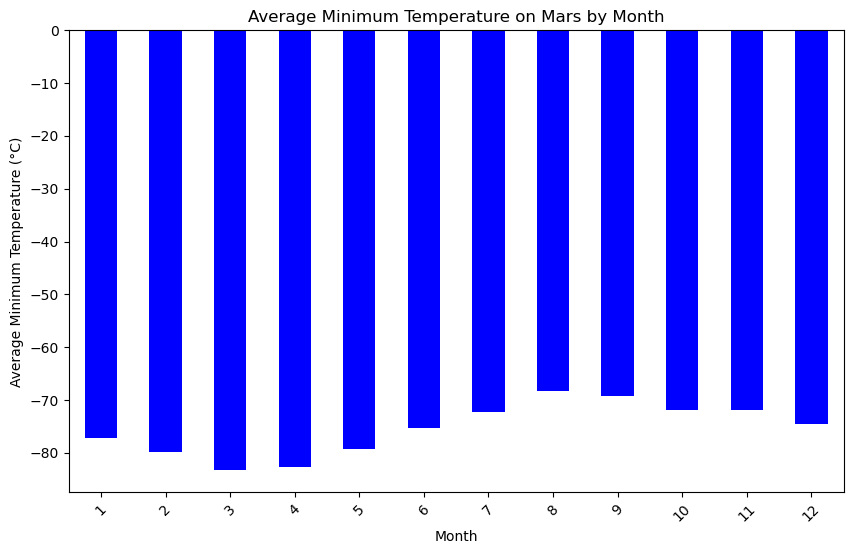

In [33]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_min_temp_by_month.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature on Mars by Month')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Identify the coldest and hottest months in Curiosity's location

coldest_month = average_min_temp_by_month.idxmin()
hottest_month = average_min_temp_by_month.idxmax()

print("Coldest month:", coldest_month)
print("Hottest month:", hottest_month)


Coldest month: 3
Hottest month: 8


In [37]:
# 4. Average pressure by Martian month
average_pressure_by_month = mars_temp_df.groupby('month')['pressure'].mean()

print(average_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


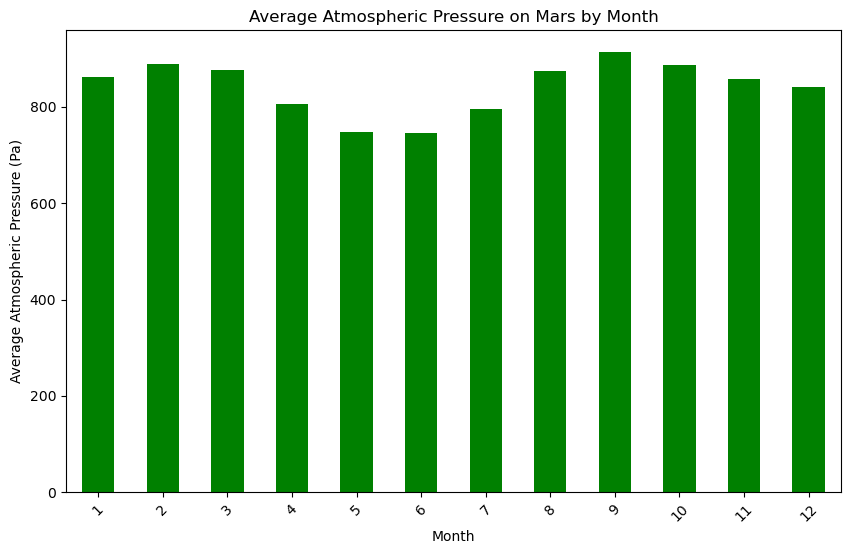

In [38]:
# Plot the average pressure by month

plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar', color='green')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.title('Average Atmospheric Pressure on Mars by Month')
plt.xticks(rotation=45)
plt.show()


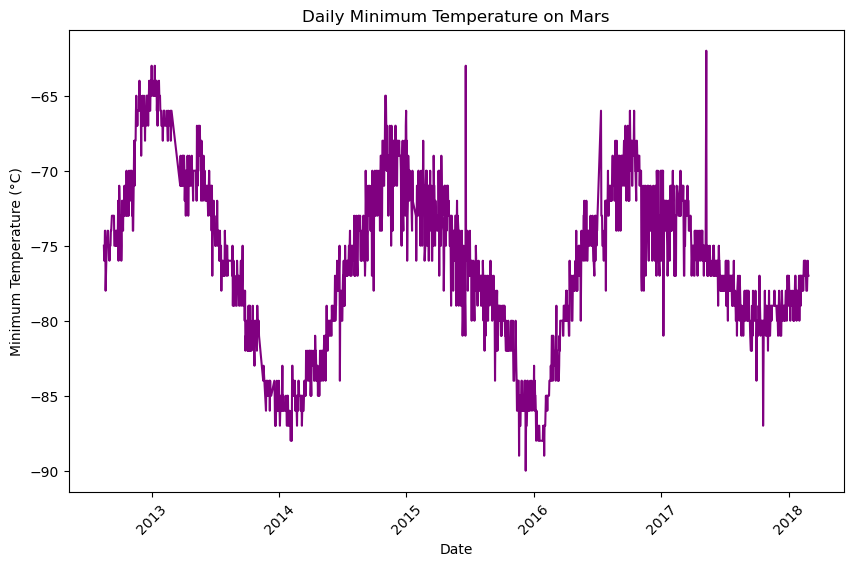

In [39]:
# 5. How many terrestrial (earth) days are there in a Martian year?

plt.figure(figsize=(10, 6))
plt.plot(mars_temp_df['terrestrial_date'], mars_temp_df['min_temp'], color='purple')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars')
plt.xticks(rotation=45)
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [40]:
# Write the data to a CSV
mars_temp_df.to_csv('mars_temperature_data.csv', index=False)


In [41]:
browser.quit()